In [1]:
#Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Paso 2: Cargar los datos en un dataframe
d1 = pd.read_csv(r"./ratings/1.csv")
d2 = pd.read_csv(r"./ratings/2.csv")
d3 = pd.read_csv(r"./ratings/3.csv")
d4 = pd.read_csv(r"./ratings/4.csv")
d5 = pd.read_csv(r"./ratings/5.csv")
d6 = pd.read_csv(r"./ratings/6.csv")
d6 = pd.read_csv(r"./ratings/7.csv")
d7 = pd.read_csv(r"./ratings/8.csv")


In [3]:
# Concatenación de los datasets
ratings = pd.concat([d1, d2, d3, d4, d5, d6, d7], ignore_index=True)

In [4]:
#cambiamos el nombre de la columna movieId a id
ratings = ratings.rename(columns={'movieId': 'id'})

In [5]:
# Cálculo del promedio de las calificaciones por película de la columna rating, agrupadas por la columna id
ratings['score'] = ratings.groupby('id')['rating'].transform('mean')

In [6]:
df = pd.read_csv(r"DATOS/PLATAFORMAS.csv")

In [7]:
#UNO EL ARCHIVO CON EL DF FINAL
dfUni =  pd.merge(df, ratings, on='id')

In [8]:
# Seleccionar las columnas 'userId', 'rating_y', 'id' y 'title'

dfUni = dfUni.loc[:, ['userId', 'rating_y', 'id', 'title', 'listed_in', 'score']]

In [9]:
dfUni.head()

,userId,rating_y,id,title,listed_in,score
0,543,5.0,as1,the grand seduction,"comedy, drama",3.47494
1,595,3.0,as1,the grand seduction,"comedy, drama",3.47494
2,611,3.0,as1,the grand seduction,"comedy, drama",3.47494
3,2523,3.5,as1,the grand seduction,"comedy, drama",3.47494
4,3082,4.0,as1,the grand seduction,"comedy, drama",3.47494


In [10]:
# Utilizando el método shape
num_filas = dfUni.shape[0]
print("El dataframe tiene", num_filas, "filas.")

El dataframe tiene 9524289 filas.


In [11]:
#GUARDAMOS EL ARCHIVO 
dfUni.to_csv(r'DATOS/RATINGS_PARA_ML.csv')

In [12]:
df = pd.read_csv(r"DATOS/RATINGS_PARA_ML.csv")

In [13]:
df

,Unnamed: 0,userId,rating_y,id,title,listed_in,score
0,0,543,5.0,as1,the grand seduction,"comedy, drama",3.474940
1,1,595,3.0,as1,the grand seduction,"comedy, drama",3.474940
2,2,611,3.0,as1,the grand seduction,"comedy, drama",3.474940
3,3,2523,3.5,as1,the grand seduction,"comedy, drama",3.474940
4,4,3082,4.0,as1,the grand seduction,"comedy, drama",3.474940
...,...,...,...,...,...,...,...
9524284,9524284,122699,4.0,ns8807,zubaan,"dramas, international movies, music & musicals",3.563397
9524285,9524285,122869,4.0,ns8807,zubaan,"dramas, international movies, music & musicals",3.563397
9524286,9524286,123708,3.0,ns8807,zubaan,"dramas, international movies, music & musicals",3.563397
9524287,9524287,123841,4.0,ns8807,zubaan,"dramas, international movies, music & musicals",3.563397


In [14]:
# Utilizando el método shape
num_filas = df.shape[0]
print("El dataframe tiene", num_filas, "filas.")

El dataframe tiene 9524289 filas.


In [15]:
# Paso 3: Observar los primeros registros del dataframe
print(df.head())

   Unnamed: 0  userId  rating_y   id                title      listed_in  \
0           0     543       5.0  as1  the grand seduction  comedy, drama   
1           1     595       3.0  as1  the grand seduction  comedy, drama   
2           2     611       3.0  as1  the grand seduction  comedy, drama   
3           3    2523       3.5  as1  the grand seduction  comedy, drama   
4           4    3082       4.0  as1  the grand seduction  comedy, drama   

     score  
0  3.47494  
1  3.47494  
2  3.47494  
3  3.47494  
4  3.47494  


In [16]:
# Paso 4: Observar la cantidad de registros y columnas del dataframe
print('Registros:', df.shape[0])
print('Columnas:', df.shape[1])

Registros: 9524289
Columnas: 7


In [17]:
# Paso 5: Observar el tipo de dato de cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524289 entries, 0 to 9524288
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   userId      int64  
 2   rating_y    float64
 3   id          object 
 4   title       object 
 5   listed_in   object 
 6   score       float64
dtypes: float64(2), int64(2), object(3)
memory usage: 508.7+ MB
None


In [18]:
# Paso 6: Observar la distribución de los datos numéricos del dataframe
print(df.describe())

         Unnamed: 0        userId      rating_y         score
count  9.524289e+06  9.524289e+06  9.524289e+06  9.524289e+06
mean   4.762144e+06  6.361570e+04  3.531331e+00  3.531331e+00
std    2.749426e+06  6.020791e+04  1.059528e+00  5.236547e-02
min    0.000000e+00  1.000000e+00  5.000000e-01  3.294964e+00
25%    2.381072e+06  2.469600e+04  3.000000e+00  3.496032e+00
50%    4.762144e+06  4.902000e+04  3.500000e+00  3.531469e+00
75%    7.143216e+06  7.363400e+04  4.000000e+00  3.566748e+00
max    9.524288e+06  2.708960e+05  5.000000e+00  3.737562e+00


In [19]:
# Paso 7: Observar la distribución de los datos categóricos del dataframe
print(df['listed_in'].value_counts())

drama                                   440150
comedy                                  252301
documentaries                           238020
comedy, drama                           174406
drama, suspense                         165432
                                         ...  
kids' tv, tv comedies, teen tv shows       368
comedy, international, sketch comedy       367
action-adventure, superhero                367
action, anime, science fiction             354
animation, young adult audience            348
Name: listed_in, Length: 1687, dtype: int64


In [20]:
df = df.drop(['Unnamed: 0'], axis=1)

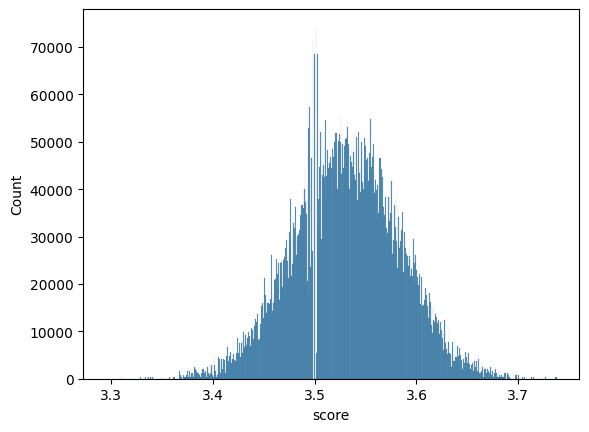

In [21]:
# Paso 8: Visualizar la distribución de los datos numéricos del dataframe
sns.histplot(df['score'])
plt.show()

In [22]:
# Paso 9: Analisis de nulos

print(df.isnull().sum())


userId       0
rating_y     0
id           0
title        0
listed_in    0
score        0
dtype: int64


C:\Users\W10-PC\AppData\Local\Temp\ipykernel_19304\1964754224.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


<Axes: >

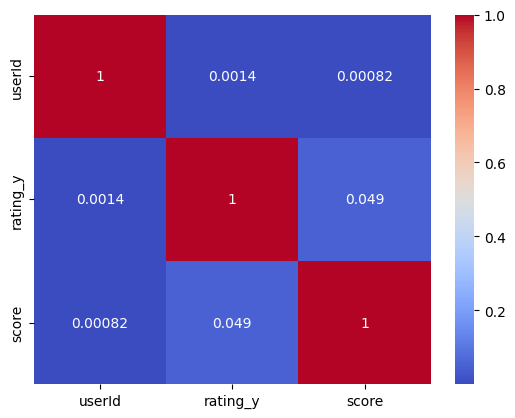

In [23]:
# Paso 10: Observar la correlación entre los datos numéricos del dataframe
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

<Axes: >

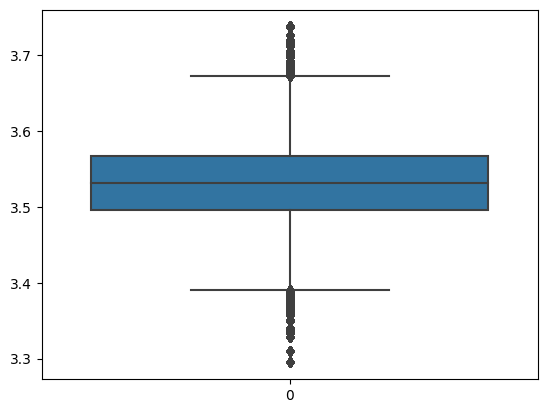

In [24]:
# Análisis de valores atípicos
sns.boxplot(df['score'])

In [25]:
df.to_csv(r'DATOS/RATINGS_PARA_ML.csv')